# Úkol č. 4 - regrese
**Deadline úkolu je uveden na [course pages](https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html).**

  * Cílem tohoto úkolu je vyzkoušet si řešit regresní problém na reálných datech.
  
> **Nejdůležitější na úkolu je to, abyste udělali vše procesně správně: korektní rozdělení datasetu, ladění hyperparametrů, vyhodnocení výsledků atp.**

## Dataset

  * Zdrojem dat je soubor `LifeExpectancyData.csv` na course pages (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * Popis datasetu najdete na uvedené stránce s originálem datasetu.
  * Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.
  

## Pokyny k vypracování
Body zadání, za jejichž (poctivé) vypracování získáte 12 bodů:

  1. Odeberte z dat body u kterých neznáte vysvětlovanou proměnnou.
  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.).
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
    * K měření chyby použijte `mean_absolute_error`.
    * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
    * Experimentujte se standardizací/normalizací dat.
    * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
  1. Použijte i jiný model než jen lineární a hřebenovou regresi.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte tento Jupyter Notebook.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
RS = 42

### Nacteni dat a zakladni pruzkum a upravy

In [4]:
data = pd.read_csv('./LifeExpectancyData.csv')


In [5]:
cooler_columns = ['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv', 'gdp', 'population',
       'thinness_1_19', 'thinness_5_9',
       'income_composition', 'schooling']
data.columns = cooler_columns
data

country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  polio  total_expenditure  diphtheria   hiv         gdp  population  \
0     ...    6.0               8.16        65.0   0.1  584.259210  33736494.0   
1     ...   58.0               8.18        62.0   0.1  612.696514    327582.0   
2     ...   62.0               8.13        64.0   0.1  631.744976  31731688.0   
3     ...   67.0               8.52        67.0   0.1  669.959000   3696958.0   
4     ...   68.0               7.87        68.0   0.1   63.537231   2978599.0   
...   ...    ...                ...         ...   ...         ...         ...   
2933  ...   67.0               7.13        65.0  33.6  454.366654  12777511.0   
2934  ...    7.0               6.52        68.0  36.7  453.351155  12633897.0   
2935  ...   73.0               6.53        71.0  39.8   57.348340    125525.0   
2936  ...   76.0               6.16        75.0  42.1  548.587312  12366165.0   
2937  ...   78.0               7.10        78.0  43.5  547.358879  12222251.0   

      thinness_1_19  thinness_5_9  income_composition  schooling  
0              17.2          17.3               0.479       10.1  
1              17.5          17.5               0.476       10.0  
2              17.7          17.7               0.470        9.9  
3              17.9          18.0               0.463        9.8  
4              18.2          18.2               0.454        9.5  
...             ...           ...                 ...        ...  
2933            9.4           9.4               0.407        9.2  
2934            9.8           9.9               0.418        9.5  
2935            1.2           1.3               0.427       10.0  
2936            1.6           1.7               0.427        9.8  
2937           11.0          11.2               0.434        9.8  

[2938 rows x 22 columns]

In [6]:
data.info(), data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2938 non-null   object 
 1   year                    2938 non-null   int64  
 2   status                  2938 non-null   object 
 3   life_expectancy         2928 non-null   float64
 4   adult_mortality         2928 non-null   float64
 5   infant_deaths           2938 non-null   int64  
 6   alcohol                 2744 non-null   float64
 7   percentage_expenditure  2938 non-null   float64
 8   hepatitis_b             2385 non-null   float64
 9   measles                 2938 non-null   int64  
 10  bmi                     2904 non-null   float64
 11  under_five_deaths       2938 non-null   int64  
 12  polio                   2919 non-null   float64
 13  total_expenditure       2712 non-null   float64
 14  diphtheria              2919 non-null   

(None,
 country                    193
 year                        16
 status                       2
 life_expectancy            362
 adult_mortality            425
 infant_deaths              209
 alcohol                   1076
 percentage_expenditure    2328
 hepatitis_b                 87
 measles                    958
 bmi                        608
 under_five_deaths          252
 polio                       73
 total_expenditure          818
 diphtheria                  81
 hiv                        200
 gdp                       2490
 population                2278
 thinness_1_19              200
 thinness_5_9               207
 income_composition         625
 schooling                  173
 dtype: int64)

In [7]:
# odstraneni 10 chybejicich hodnot ze sloupcu life_expectancy
data = data[data['life_expectancy'].notnull()]

Odstranime priznak `year` protoze nechceme, aby model hledal zavislosti dle roku. Ocekavame, samozrejme, ze delka zivota casem stoupa, ale nomu tak nemusi byt ve vsech statech

In [8]:
data = data.drop(columns='year')

Rovnou zakodujeme binarni priznak `status` a `country` one-hot encodingem 

In [9]:
dummies = pd.get_dummies(data['country'], prefix='country')
data_cat = pd.concat([data, dummies], axis=1, ignore_index=True)
data_cat.columns = list(data.columns) + [i.lower()for i in dummies.columns]
data_cat = data_cat.drop(columns='country')
data = data_cat

In [10]:
dummies = pd.get_dummies(data.status)
data = data.drop(columns='status')
res = pd.concat([data, dummies], axis=1, ignore_index=True)
res.columns = list(data.columns) + list(dummies.columns)
data = res

In [11]:
# rozdelelni dat 
X = data.drop(columns=['life_expectancy'])
y = data['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=RS)

In [12]:
X_train

adult_mortality  infant_deaths  alcohol  percentage_expenditure  \
2836            192.0             24     1.78               40.133421   
408             293.0             46     4.58               73.927306   
1315             57.0              2     0.01               88.833622   
2308            496.0             30     3.99               38.524548   
135              76.0              0    12.00             8329.731655   
...               ...            ...      ...                     ...   
1640             63.0              0     7.38              335.518057   
1097            297.0              5     2.64               28.301911   
1132             29.0             17     5.57               38.109043   
1296             75.0              2     9.69                3.122230   
862             343.0              7     0.56                6.913998   

      hepatitis_b  measles   bmi  under_five_deaths  polio  total_expenditure  \
2836         99.0      737  37.5                 28   99.0               5.11   
408          89.0       12  15.1                 83   93.0               6.63   
1315          NaN      462  28.6                  3   99.0               1.23   
2308          NaN        7  18.8                 47   69.0              11.66   
135          83.0      448  54.2                  0   83.0               1.60   
...           ...      ...   ...                ...    ...                ...   
1640         86.0        1  67.1                  0   73.0               8.33   
1097          NaN       12  21.9                  7   77.0               6.50   
1132          NaN        0  38.5                 24    6.0               4.41   
1296         95.0        0  55.7                  3   96.0               8.11   
862          91.0      376  13.3                 10   95.0               3.50   

      ...  country_uruguay  country_uzbekistan  country_vanuatu  \
2836  ...                0                   1                0   
408   ...                0                   0                0   
1315  ...                0                   0                0   
2308  ...                0                   0                0   
135   ...                0                   0                0   
...   ...              ...                 ...              ...   
1640  ...                0                   0                0   
1097  ...                0                   0                0   
1132  ...                0                   0                0   
1296  ...                0                   0                0   
862   ...                0                   0                0   

      country_venezuela (bolivarian republic of)  country_viet nam  \
2836                                           0                 0   
408                                            0                 0   
1315                                           0                 0   
2308                                           0                 0   
135                                            0                 0   
...                                          ...               ...   
1640                                           0                 0   
1097                                           0                 0   
1132                                           0                 0   
1296                                           0                 0   
862                                            0                 0   

      country_yemen  country_zambia  country_zimbabwe  Developed  Developing  
2836              0               0                 0          0           1  
408               0               0                 0          0           1  
1315              0               0                 0          1           0  
2308              0               0                 0          0           1  
135               0               0                 0          1           0  
...             ...             ... 

### Probemy v datech 
#### a) Chybejici hodnoty

In [14]:
nans = X_train.iloc[:, :18].isnull().sum()
nans

adult_mortality             0
infant_deaths               0
alcohol                   167
percentage_expenditure      0
hepatitis_b               467
measles                     0
bmi                        26
under_five_deaths           0
polio                      14
total_expenditure         196
diphtheria                 14
hiv                         0
gdp                       372
population                550
thinness_1_19              26
thinness_5_9               26
income_composition        139
schooling                 139
dtype: int64

In [15]:
nan_cols = nans[nans > 0].index
nan_df = X_train[nan_cols]
nan_df.head()

alcohol  hepatitis_b   bmi  polio  total_expenditure  diphtheria  \
2836     1.78         99.0  37.5   99.0               5.11        99.0   
408      4.58         89.0  15.1   93.0               6.63        89.0   
1315     0.01          NaN  28.6   99.0               1.23        96.0   
2308     3.99          NaN  18.8   69.0              11.66        65.0   
135     12.00         83.0  54.2   83.0               1.60        83.0   

               gdp  population  thinness_1_19  thinness_5_9  \
2836    546.776852     26167.0            3.2           3.2   
408     475.111220   1425221.0            9.8           9.3   
1315   3896.211510    127276.0            2.0           1.7   
2308    263.145817   5439695.0            9.5           9.5   
135   51386.376650   8321496.0            1.7           1.9   

      income_composition  schooling  
2836               0.620       11.7  
408                0.334        4.9  
1315               0.899       15.3  
2308               0.332        7.6  
135                0.864       15.1

Vsechny sloupce jsou numericke, coz je dobre. Najdeme popis techto priznaku, aby doplnovani kazdeho davalo smysl.

* alcohol - recorded per capita (15+) consumption (in litres of pure alcohol)
* hepatitis_b - immunization coverage among 1-year-olds (%)
* bmi - Average Body Mass Index of entire population
* polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
* total_expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* gdp - Gross Domestic Product per capita (in USD)
* population - Population of the country
* thinness_1_19 - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness_5_9 - Prevalence of thinness among children for Age 5 to 9(%)
* income_composition - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* schooling - Number of years of Schooling(years)

Nemuzeme pouzit imputaci medianem, protoze urovne statu se v tomto datasetu dramaticky lisi. Na doplneni pouzijeme kNN Imputer

In [16]:
knn_imp = KNNImputer(n_neighbors=5)
train_res = knn_imp.fit_transform(X_train)
test_res = knn_imp.transform(X_test)

X_train = pd.DataFrame(train_res, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(test_res, index=X_test.index, columns=X_test.columns)


In [17]:
# check
X_train.isnull().sum().sum() == 0, X_test.isnull().sum().sum() == 0

(True, True)

Data jsou pripravena k uceni. Vytvorime finkci, ktera bude model ucit a vracet metriky a pak budeme experimentovat a sledovat zmeny accuracy score 

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.metrics import mean_absolute_error

In [19]:
def get_score(*args, alpha=0.02, show_feature_importance=False):
    X_train, X_test, y_train, y_test = args
    lr = LinearRegression()
    rr = Ridge(alpha=alpha)
    
    lr_preds = lr.fit(X_train, y_train).predict(X_test)
    rr_preds = rr.fit(X_train, y_train).predict(X_test)
   
    print(f"Linear Regression MAE: {mean_absolute_error(y_test, lr_preds):.6}\nRidge Regression MAE: {mean_absolute_error(y_test, rr_preds):.6}")
    if show_feature_importance:
        d = {col: (w1, w1) for col, w1, w2 in zip(X_train.columns, lr.coef_, rr.coef_)}
        print("\nFeatures sorted by sum of absolut values of their weights:")
        display(sorted(d.items(), key=lambda it: abs(it[1][0]) + abs(it[1][1]), reverse=True))

In [20]:
get_score(X_train, X_test, y_train, y_test)

Linear Regression MAE: 1.49096
Ridge Regression MAE: 1.48971


#### Skalovani
zkusime aplikovat skalovaci metody na data. Pred aplikovanim scaling metod musime zkontrolovat distribuce jednotlivych priznaku, protoze vetsina skalovacich metod neni rezistentni k odlehlym hodnotam.

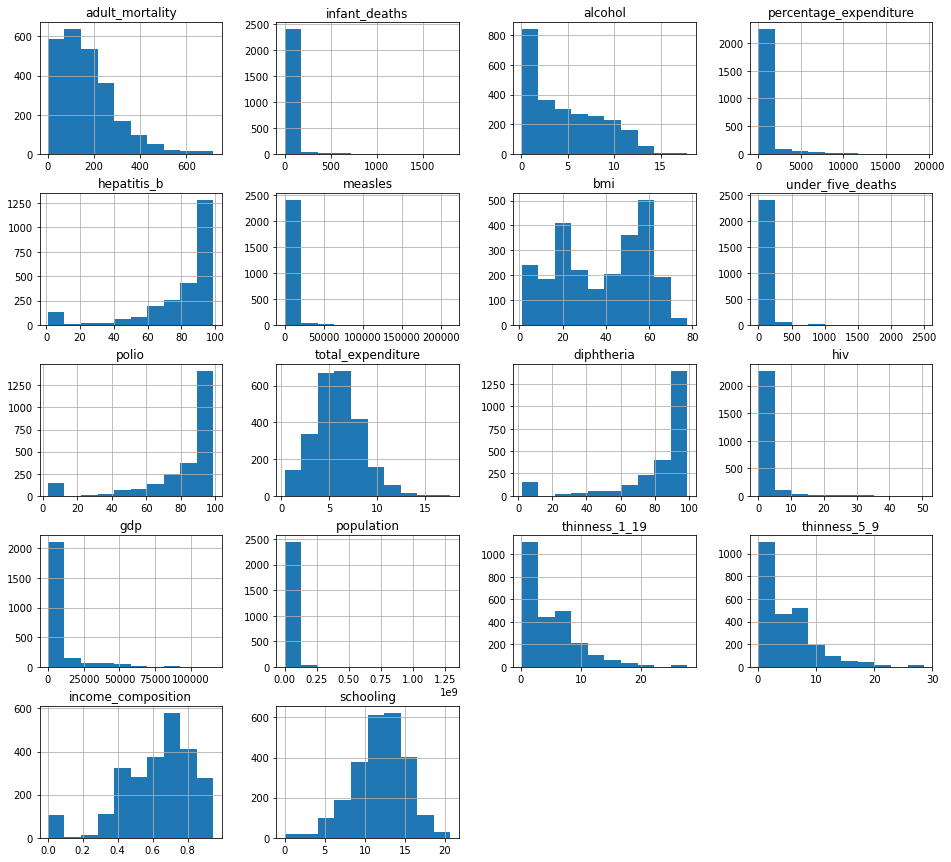

In [21]:
X_train.iloc[:, :18].hist(figsize=(16, 15));

Vetsina priznaku ma exponencialni rozdeleni, coz docela vadi skalovacim metodam jako standardizace nebo min_max scale. Presto zkusime aplikovat standrdizaci a podivat se na vysledky. Pak zkusime aplikovat nejakou skalovaci metodu, ktera je rezistentni k outlierum, napr `RobustScaler`

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
scaling_cols = ['adult_mortality', 'infant_deaths', 'alcohol',
                'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
                'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv',
                'gdp', 'population', 'thinness_1_19', 'thinness_5_9',
                'income_composition', 'schooling']

X_train_ss = X_train.copy() 
X_test_ss = X_test.copy()

ss = StandardScaler()
X_train_ss[scaling_cols] = ss.fit_transform(X_train_ss[scaling_cols])
X_test_ss[scaling_cols] = ss.transform(X_test_ss[scaling_cols])

In [25]:
get_score(X_train_ss, X_test_ss, y_train, y_test)

Linear Regression MAE: 1.49097
Ridge Regression MAE: 1.48849


Vysledky se moc neliseji

In [26]:
X_train_rs = X_train.copy() 
X_test_rs = X_test.copy()

rs = StandardScaler()
X_train_rs[scaling_cols] = rs.fit_transform(X_train_rs[scaling_cols])
X_test_rs[scaling_cols] = rs.transform(X_test_rs[scaling_cols])

In [28]:
get_score(X_train_rs, X_test_rs, y_train, y_test, show_feature_importance=False)

Linear Regression MAE: 1.49097
Ridge Regression MAE: 1.48849


Proc skalovani u tohoto datasetu zrovna nepomaha? Zijistil jsem to po cross-validaci. Linearni modely defaultne normaliujou data pred ucenim, a prave proto vysledky se neliseji. 

Mam napad (ktery implementovat nebudu) aplikovat na priznaky s exponencialnim (nebo log-normalnim) rozdelenim box-cox trnsformaci. Mozna by to pomohlo zlepsit performance  

### Cross-validace 
provedme cross validaci na nasich linearnich modelech a na nejakych jinych taky. Najdeme nejlepsi hyperpararmetry jednotlivych modelu a mozna dozvime neco navic o datech

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
models = [
    DecisionTreeRegressor(random_state=RS),
    RandomForestRegressor(random_state=RS),
    AdaBoostRegressor(random_state=RS),
    LinearRegression(),
    Ridge(random_state=RS)
]

grid = {
    'DecisionTreeRegressor': {
        'max_depth': range(2, 15)
    },
    'RandomForestRegressor': {
        'n_estimators': range(20, 100, 5),
        'max_depth': range(5, 15)
    },
    'AdaBoostRegressor': {
        'n_estimators': range(20, 100, 5),
        'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
    },
    'LinearRegression': {
        'normalize': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],
        'normalize': [True, False]
    }
}

scores = {}
for model in tqdm(models, position=0):
    search = GridSearchCV(estimator=model, 
                          param_grid=grid[model.__class__.__name__],
                          scoring='neg_mean_absolute_error',
                          cv=5)
    search.fit(X_train, y_train)
    scores[search.best_score_] = search


100%|██████████| 5/5 [22:50<00:00, 274.05s/it]


In [31]:
scores

{-1.6838411131088928: GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'max_depth': range(2, 15)},
              scoring='neg_mean_absolute_error'),
 -1.2589014080044707: GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
              param_grid={'max_depth': range(5, 15),
                          'n_estimators': range(20, 100, 5)},
              scoring='neg_mean_absolute_error'),
 -2.409975789790168: GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
              param_grid={'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3,
                                            1],
                          'n_estimators': range(20, 100, 5)},
              scoring='neg_mean_absolute_error'),
 -1.4805743423085478: GridSearchCV(cv=5, estimator=LinearRegression(),
              param_grid={'normalize': [True, False]},
              scoring='neg_mean_absolute_error'),
 -1.475180008663138: GridSearchCV(cv=5, estimat

In [33]:
test_mae = []
for model in scores.values():
    best_model_CV = model.best_estimator_
    y_pred_test = best_model_CV.predict(X_test)
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    print(f'MAE {best_model_CV.__class__.__name__} = {test_mae[-1]:.4}')

MAE DecisionTreeRegressor = 1.405
MAE RandomForestRegressor = 1.113
MAE AdaBoostRegressor = 2.345
MAE LinearRegression = 1.491
MAE Ridge = 1.486


In [34]:
cvs = list(scores.values())
cvs[1].best_estimator_

RandomForestRegressor(max_depth=14, n_estimators=95, random_state=42)

In [37]:
cvs[4].best_estimator_

Ridge(alpha=0.1, random_state=42)

In [36]:
feat_imp = [(col, w) for col, w in zip(X_test.columns, cvs[1].best_estimator_.feature_importances_)]
sorted(feat_imp, key=lambda x: x[1], reverse=True)[:10] 

[('hiv', 0.5458364472174081),
 ('income_composition', 0.23745077846517243),
 ('adult_mortality', 0.11767451138447985),
 ('schooling', 0.01553387924616164),
 ('bmi', 0.010840789944754367),
 ('alcohol', 0.01000573238275605),
 ('thinness_5_9', 0.007820465065198678),
 ('under_five_deaths', 0.007520803526195116),
 ('total_expenditure', 0.004837696128741805),
 ('infant_deaths', 0.004454025622039694)]

### Zaver
* Model Linearni regresi je rezistentni k vysoke dimenzionalite v datech
* Imputovali jsme chybejici hodnoty KNNkem a dosahli jsme docela dobrych vysledku, s prihlednutim k jejich poctu. 
* implementace linearni regresi v sklearn defaultne normalizue data pred ucenim a proto preskalovani nam vysledky nezmenilo.
* Nejlepsi testovaci presnosti jsme dosahli modelem `RandomForestRegression` s parametry `max_depth=14, n_estimators=95`
* optimalni learning rate u modelu `Ridge` = 0.1
* Podle modelu `RandomForestRegression`, priznaky s nejvetsim vlivem na ocekavanou delku zivota jsou `hiv`, `income_composition`, `adult_mortality`